In [26]:
import os  #For path loading
import cv2  #For working with images
import numpy as np  #Array releted work
import matplotlib.pyplot as plt  #For ploting images
from sklearn.model_selection import train_test_split  #Deviding data in training and testing
import tensorflow as tf  #For neural network
from tensorflow import keras  #For training and testing neural network
import random  #To assume numbers

In [27]:
#Covid Negative CT scans
C_N = "/content/drive/MyDrive/Colab Notebooks/Models/Covid/Covid Negative"
covid_negative = os.listdir(C_N)

#Covid Positive CT scans
C_P = "/content/drive/MyDrive/Colab Notebooks/Models/Covid/Covid Positive"
covid_positive = os.listdir(C_P)

In [28]:
X = []
y = []

In [29]:
for img in covid_negative:
    img_path = os.path.join(C_N, img)

    img_array = cv2.imread(img_path)  #Reading images
    img_array = img_array / 255.0  #Converting image array in 0 to 1

    i = cv2.resize(img_array, (100, 100), interpolation = cv2.INTER_NEAREST)  #Reshaping images
    X.append(i)
    y.append(0)

In [30]:
for img in covid_positive:
    img_path = os.path.join(C_P, img)

    img_array = cv2.imread(img_path)
    img_array = img_array / 255.0

    i = cv2.resize(img_array, (100, 100), interpolation = cv2.INTER_NEAREST)
    X.append(i)
    y.append(1)

In [31]:
#Converting list into numpy array
X = np.array(X)
y = np.array(y)

In [32]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)  #Deviding dataset into training and testing

In [33]:
#Our neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100, 3)),
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(2, activation='softmax')
])

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model.fit(train_X, train_y, epochs=100)  #Training model

Epoch 1/100
62/62 [==============================] - 0s 3ms/step - loss: 1.5511 - accuracy: 0.5425
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5518 - accuracy: 0.7163
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.6534
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5539 - accuracy: 0.7227
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4954 - accuracy: 0.7569
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.7686
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5721 - accuracy: 0.7317
Epoch 8/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5801 - accuracy: 0.7159
Epoch 9/100
62/62 [==============================] - 0s 4ms/step - loss: 0.4593 - accuracy: 0.7677
Epoch 10/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.7638
Epoch 11/

In [36]:
#Testing accuracy
test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=1) 
print('Test accuracy :', test_acc)

16/16 [==============================] - 0s 4ms/step - loss: 0.5035 - accuracy: 0.8189
Test accuracy : 0.818913459777832


1


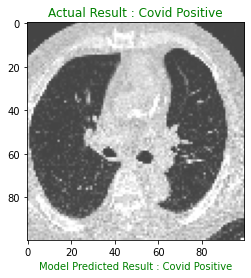

In [71]:
#Predicting results
COLOR = 'green'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['0', '1']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Actual Result : Covid Positive" if label == '1'  else "Actual Result : Covid Negative")
    plt.xlabel("Model Predicted Result : Covid Positive" if guess == '1' else "Model Predicted Result : Covid Negative")
    plt.grid(False)
    plt.show()


t = random.randint(0,len(test_X))
image = test_X[t]
label = test_y[t]
print(test_y[t])
predict(model, image, label)